In [1]:
# %matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.facecolor'] = (1,1,1,1)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

import os
# import csv
import math

from datetime import date


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# Define running mean functions
def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


In [2]:
# Define paths
rootdir_data = os.getcwd() +"/../DanskeData/" 

path_data = rootdir_data + "ssi_data/"
path_dash = rootdir_data + "ssi_dashboard/"
path_vacc = rootdir_data + "ssi_vacc/"

path_figs = os.getcwd() +"/../Figures/" 

In [3]:
latestsubdir = list(os.walk(path_data))[0][1][-1]
latestdir = path_data + latestsubdir

dfCase = pd.read_csv(latestdir+'/Test_pos_over_time.csv',delimiter = ';',dtype=str)
dfCase = dfCase.iloc[:-2]
dfCase['NewPositive'] = pd.to_numeric(dfCase['NewPositive'].astype(str).apply(lambda x: x.replace('.','')))
dfCase['Tested'] = pd.to_numeric(dfCase['Tested'].astype(str).apply(lambda x: x.replace('.','')))
dfCase['PosPct'] = pd.to_numeric(dfCase['PosPct'].astype(str).apply(lambda x: x.replace(',','.')))
dfCase['Date'] =  pd.to_datetime(dfCase.Date,format='%Y-%m-%d')
testDates = dfCase['Date']

dfAdm = pd.read_csv(latestdir+'/Newly_admitted_over_time.csv',delimiter = ';',dtype=str)
dfAdm['Dato'] = pd.to_datetime(dfAdm['Dato'])
dfAdm['Total'] = pd.to_numeric(dfAdm['Total'])
dfAdm.tail()


dfDea = pd.read_csv(latestdir+'/Deaths_over_time.csv',delimiter = ';',dtype=str)
dfDea = dfDea.iloc[:-1,:]
dfDea['Dato'] = pd.to_datetime(dfDea['Dato'])
dfDea['Antal_døde'] = pd.to_numeric(dfDea['Antal_døde'])
dfDea.tail()

dfCase.tail()

,Date,NewPositive,NotPrevPos,PosPct,PrevPos,Tested,Tested_kumulativ
853,2022-05-29,452,3.940,11.5,99,4039,64.507.020
854,2022-05-30,719,6.408,11.2,101,6509,64.513.529
855,2022-05-31,639,6.021,10.6,128,6149,64.519.678
856,2022-06-01,592,4.893,12.1,83,4976,64.524.654
857,2022-06-02,527,4.863,10.8,97,4960,64.529.614


In [6]:
allDates = dfCase.Date
allDatesAdm = dfAdm.Dato
allDatesDea = dfDea.Dato

allCases = dfCase.NewPositive.values
allAdms = dfAdm.Total.values
allDeas = dfDea['Antal_døde'].values

firstDate = np.datetime64('2021-10-01')-np.timedelta64(1,'D')
# lastDate = np.datetime64('2022-03-01')+np.timedelta64(1,'D')
lastDate = np.datetime64('2022-03-01')
lastDate = np.datetime64('today')

meanWidth = 7

In [4]:
latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdir = path_dash + latestsubdir

dfReinfFile = pd.read_csv(latestdir+'/Regionalt_DB/24_reinfektioner_daglig_region.csv',encoding='latin1',delimiter = ';')
dfReinfFile['Prøvedato'] = pd.to_datetime(dfReinfFile['Prøvedato'])
# groupdf = df.groupby(['Prøvedato').sum()
# df_reinf = dfReinfFile[dfReinfFile['Type af tilfælde (reinfektion eller bekræftet tilfælde)'] == '1.Reinfektion'].groupby('Prøvedato').sum()
# df_inf = dfReinfFile[dfReinfFile['Type af tilfælde (reinfektion eller bekræftet tilfælde)'] != '1.Reinfektion'].groupby('Prøvedato').sum()
df_reinf = dfReinfFile[dfReinfFile['Type af tilfælde (reinfektion eller første infektion)'] == '1.Reinfektion'].groupby('Prøvedato').sum()
df_inf = dfReinfFile[dfReinfFile['Type af tilfælde (reinfektion eller første infektion)'] != '1.Reinfektion'].groupby('Prøvedato').sum()

C:\Users\rakrpe\AppData\Local\Temp\ipykernel_46028\491585805.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


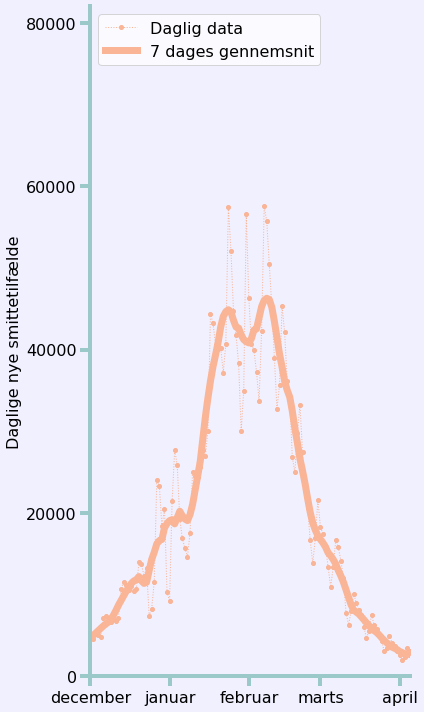

In [49]:
fig,ax1 = plt.subplots(figsize=(6,10),tight_layout=True)
fig.set_facecolor((240/255,240/255,1))
ax1.set_facecolor((240/255,240/255,1))

ax1.plot(allDates[:-1],allCases[:-1],'.:',color=(250/255,180/255,150/255),markersize=8,linewidth=1,label='Daglig data')
ax1.plot(rnTime(allDates[:-1],meanWidth),rnMean(allCases[:-1],meanWidth),color=(250/255,180/255,150/255),linewidth=7,label=f'{meanWidth} dages gennemsnit')


ax1.legend(loc='upper left')
# ax1.grid()
ax1.set_ylabel('Daglige nye smittetilfælde')
ax1.set_ylim(bottom=0)
ax1.set_xlim([firstDate,lastDate])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
ax1.spines['top'].set_visible(False) 
ax1.spines['right'].set_visible(False)


ax1.set_ylim(top=82000)


ax1.set_xlim(left=np.datetime64('2021-12-01'))
ax1.set_xlim(right=np.datetime64('2022-04-05'))

ax1.set_xticks(np.arange(np.datetime64('2021-12'),np.datetime64('2022-05')))
ax1.set_yticks(np.arange(0,100000,20000))

clrAxes = (155/255,200/255,200/255)
ax1.spines['bottom'].set_color(clrAxes)
ax1.spines['left'].set_color(clrAxes)
ax1.tick_params(axis='both', colors=clrAxes)

# ax1.xaxis.label.set_color('k')
# ax1.tick_params(axis='x', colors=clrAxes)
[t.set_color('k') for t in ax1.xaxis.get_ticklabels()]
[t.set_color('k') for t in ax1.yaxis.get_ticklabels()]


# change all spines
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(4)

# increase tick width
ax1.tick_params(width=4,length=10)

fig.show()

fig.savefig(path_figs+'OmikronWaveVidenskabDK')

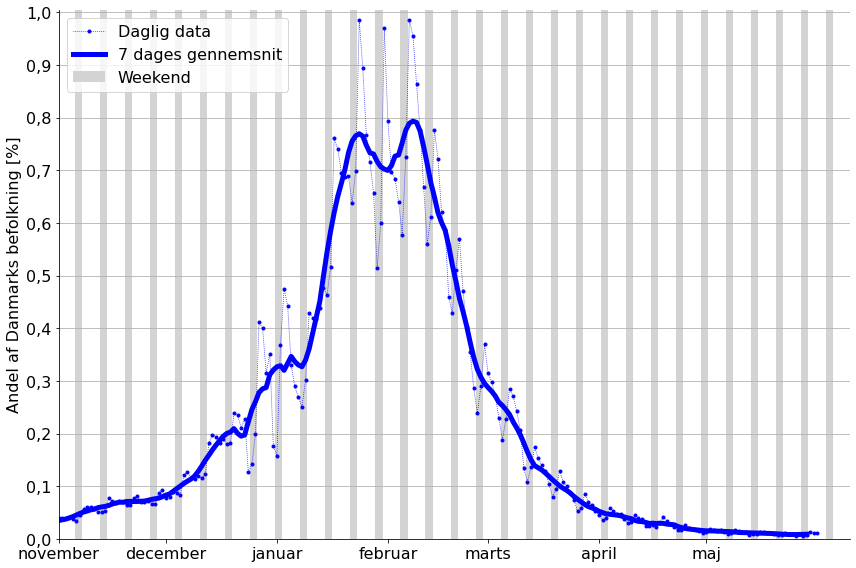

In [10]:
fig,ax1 = plt.subplots(tight_layout=True)

dkpop = 5831000

# ax1.plot(allDatesShift[:-1],100*allCases[:-1]/dkpop,'k.:',markersize=4,linewidth=0.5,label='2020/2021')
# ax1.plot(rnTime(allDatesShift[:-1],meanWidth),rnMean(100*allCases[:-1]/dkpop,meanWidth),'k',label=f'2020/2021, {meanWidth} dages gennemsnit')
ax1.plot(allDates[:-1],100*allCases[:-1]/dkpop,'b.:',markersize=6,linewidth=0.75,label='Daglig data')
ax1.plot(rnTime(allDates[:-1],meanWidth),rnMean(100*allCases[:-1]/dkpop,meanWidth),'b',linewidth=5,label=f'{meanWidth} dages gennemsnit')


# ax1.plot(allDatesShift,allCases,'k.:',markersize=4,linewidth=0.5,label='2020/2021')
# ax1.plot(rnTime(allDatesShift,meanWidth),rnMean(allCases,meanWidth),'k',label=f'2020/2021, {meanWidth} dages gennemsnit')
# ax1.plot(allDates,allCases,'b.:',markersize=4,linewidth=0.5,label='2021/2022')
# ax1.plot(rnTime(allDates,meanWidth),rnMean(allCases,meanWidth),'b',label=f'2021/2022, {meanWidth} dages gennemsnit')

ax1.legend(loc='upper left')
# ax1.grid()
ax1.set_ylabel('Andel af Danmarks befolkning [%]')
ax1.set_ylim(bottom=0)
ax1.set_xlim([firstDate,lastDate])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
ax1.spines['top'].set_visible(False) 
ax1.spines['right'].set_visible(False)

# Draw weekends
firstSunday = np.datetime64('2021-10-03')
numWeeks = 52
for k in range(-numWeeks,numWeeks):
     curSunday = firstSunday + np.timedelta64(7*k,'D')
     ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')
ax1.grid(axis='y')
ax1.legend(loc='upper left')


ax1.set_xticks(np.arange(np.datetime64('2021-11'),np.datetime64('2022-06')))
# ax1.set_xlim(left=np.datetime64('2021-11-01'),right=np.datetime64('2022-04-01'))
ax1.set_xlim(left=np.datetime64('2021-11-01'),right=lastDate)

ax1.set_ylim(top=1.005)
curYticks = np.arange(0,1.1,0.1)
ax1.set_yticks(curYticks)
ax1.set_yticklabels([str(np.round(x*10)/10).replace('.',',') for x in curYticks])

fig.tight_layout()